# LSTM Model

In [23]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('fivethirtyeight')

In [24]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)  
    """ 
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [25]:
stock_cleaned_data=pd.read_csv('../data/stock_cleaned_data.csv', index_col = 0)
stock_cleaned_data.head()

,open,high,low,close,adjclose,volume
date,,,,,,
1999-11-01,136.500000,137.000000,135.562500,135.562500,88.217185,4006500
1999-11-02,135.968704,137.250000,134.593704,134.593704,87.586742,6516900
1999-11-03,136.000000,136.375000,135.125000,135.500000,88.176513,7222300
1999-11-04,136.750000,137.359299,135.765594,136.531204,88.847568,7907500
1999-11-05,138.625000,139.109299,136.781204,137.875000,89.722043,7431500


In [ ]:
data = pd.DataFrame(stock_cleaned_data)

In [46]:
data.drop(['volume'], axis=1, inplace = True)
data['MA100'] = MA(dataset, len(dataset), 100)
data['MA100'].shift(-1)

import pandas_ta as ta
data['RSI']=ta.rsi(data['adjclose'], length=15)
data['target'] = data['adjclose'].shift(-1)
data.dropna(inplace = True)
data.head()

,open,high,low,close,adjclose,MA100,RSI,target
date,,,,,,,,
1999-11-22,142.437500,143.000000,141.5000,142.468704,92.711392,138.830063,79.387602,91.897955
1999-11-23,142.843704,142.843704,140.3750,141.218704,91.897955,138.970571,71.264847,92.386017
1999-11-24,140.750000,142.437500,140.0000,141.968704,92.386017,139.137134,73.038272,92.040336
1999-11-26,142.468704,142.875000,141.2500,141.437500,92.040336,139.258206,69.770625,91.714962
1999-11-29,140.875000,141.921799,140.4375,140.937500,91.714962,139.342171,66.758564,90.637129


In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data)
scale = np.max(data['target']) - np.min(data['target'])
print(data_set_scaled)

[[0.18111582 0.17805747 0.18192489 ... 0.31620353 0.8936042  0.09647095]
 [0.1821035  0.17767624 0.17917401 ... 0.31809466 0.77558104 0.09764265]
 [0.17701267 0.17668545 0.17825705 ... 0.32033647 0.80134881 0.09681277]
 ...
 [0.82969825 0.83867506 0.83355878 ... 0.99898    0.66414476 0.86605357]
 [0.83852457 0.84172399 0.83861502 ... 0.9994884  0.64145845 0.86960665]
 [0.83745471 0.83896775 0.84112138 ... 1.         0.66193279 0.87025484]]


In [49]:
X = []

backcandles = 60
print(data_set_scaled.shape[0])
for j in range(7):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])

5887


In [50]:
X=np.moveaxis(X, [0], [2])

X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

print(X.shape)
print(y.shape)

(5827, 60, 7)
(5827, 1)


In [51]:
train_data_len = int(len(X)*0.8)
print(train_data_len)
X_train, X_test = X[:train_data_len], X[train_data_len:]
y_train, y_test = y[:train_data_len], y[train_data_len:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

4661
(4661, 60, 7)
(1166, 60, 7)
(4661, 1)
(1166, 1)


In [95]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate

np.random.seed(10)

lstm_input = Input(shape=(backcandles, 7), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dropout(0.2)(inputs)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
132/132 [==============================] - 19s 91ms/step - loss: 0.0016 - val_loss: 1.4242e-04
Epoch 2/30
132/132 [==============================] - 10s 79ms/step - loss: 2.5315e-04 - val_loss: 2.3158e-04
Epoch 3/30
132/132 [==============================] - 10s 79ms/step - loss: 1.8188e-04 - val_loss: 3.3421e-04
Epoch 4/30
132/132 [==============================] - 10s 78ms/step - loss: 1.3220e-04 - val_loss: 3.4817e-04
Epoch 5/30
132/132 [==============================] - 10s 76ms/step - loss: 1.3076e-04 - val_loss: 4.8226e-04
Epoch 6/30
132/132 [==============================] - 12s 90ms/step - loss: 1.1219e-04 - val_loss: 7.0059e-05
Epoch 7/30
132/132 [==============================] - 10s 77ms/step - loss: 9.7121e-05 - val_loss: 4.9701e-05
Epoch 8/30
132/132 [==============================] - 10s 75ms/step - loss: 9.4055e-05 - val_loss: 2.9331e-04
Epoch 9/30
132/132 [==============================] - 10s 74ms/step - loss: 8.5728e-05 - val_loss: 7.0889e-05
Epoch 10/30
13

In [96]:
y_train_pred = model.predict(X_train)
print("training RMSE:", calculate_rmse(y_train_pred, y_train) * scale)

146/146 [==============================] - 6s 29ms/step
training RMSE: 2.512721630438602


**Testing the accuracy of the LSTM Model**

In [97]:
y_test_pred = model.predict(X_test)
print("testing RMSE:", calculate_rmse(y_test_pred, y_test) * scale)

37/37 [==============================] - 1s 29ms/step
testing RMSE: 7.298634749821586


<function matplotlib.pyplot.show(close=None, block=None)>

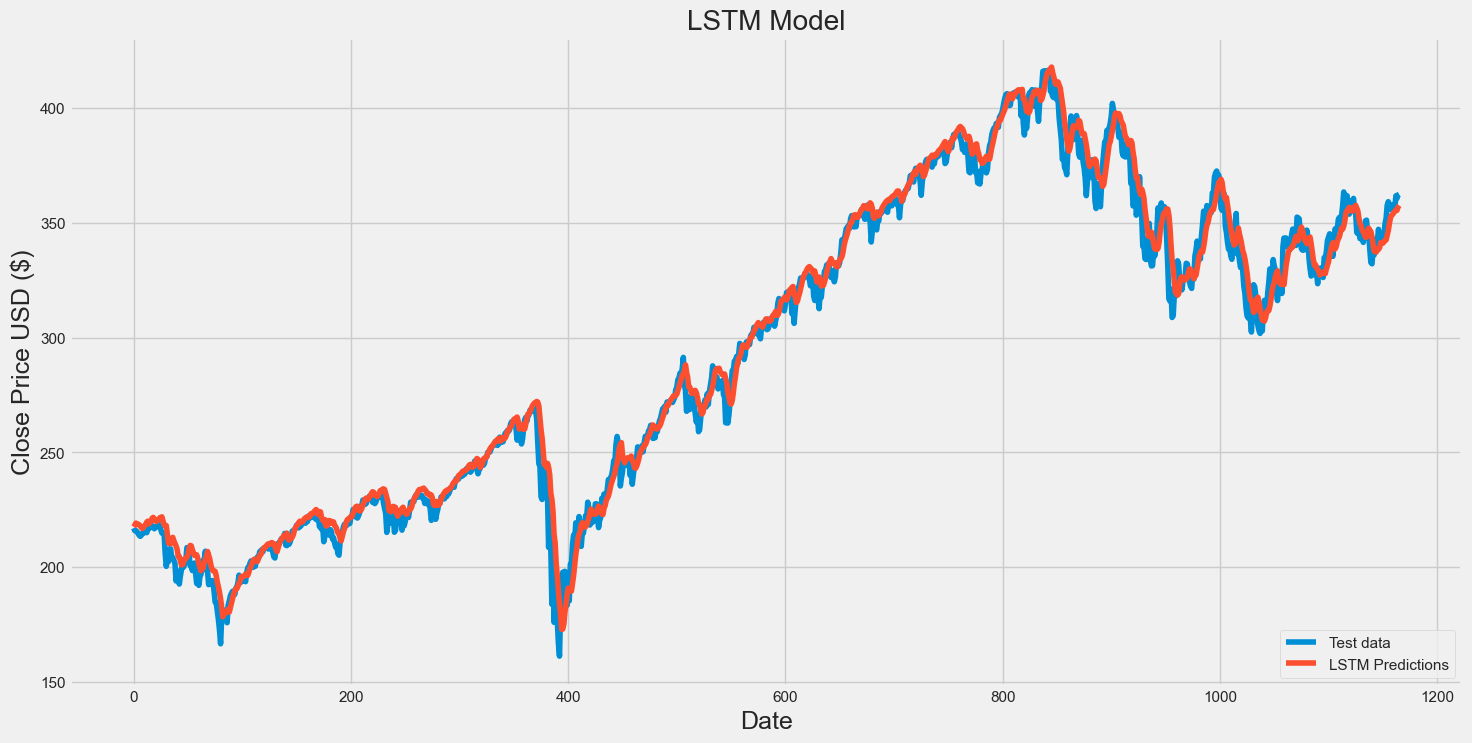

In [94]:
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(y_test * scale)
plt.plot(y_test_pred * scale)
plt.legend(['Test data','LSTM Predictions'],loc='lower right')
plt.show